In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [27]:
warnings.filterwarnings("ignore")


In [28]:
credit_risk= pd.read_csv("/UCI_Credit_Card.csv")

In [29]:
print(credit_risk.head())
df= credit_risk.copy()

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [30]:
df.drop(["ID"], axis=1, inplace= True)
print(df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

In [31]:
print(df.isnull().sum())
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
print(df.EDUCATION.value_counts())
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64
EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64


In [32]:
print(df['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64


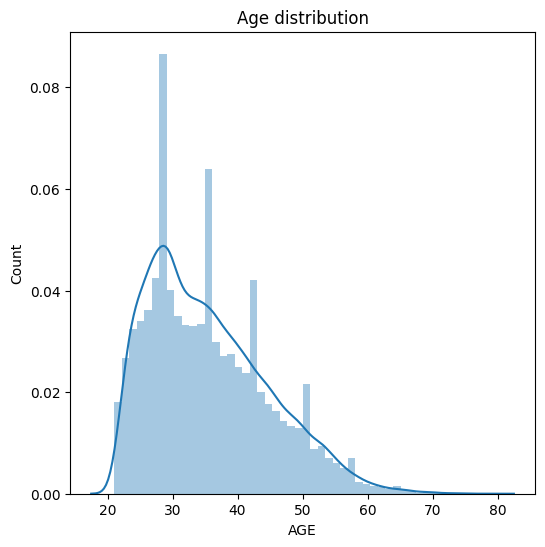

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")
plt.show()

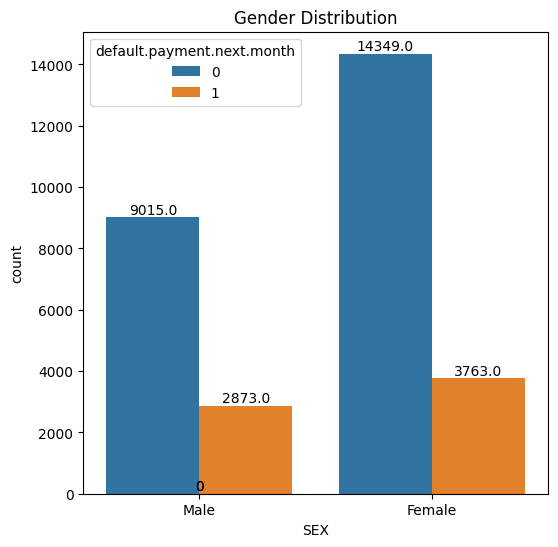

In [34]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='SEX',hue='default.payment.next.month',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1], labels=["Male", "Female"])
#plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")
plt.show()

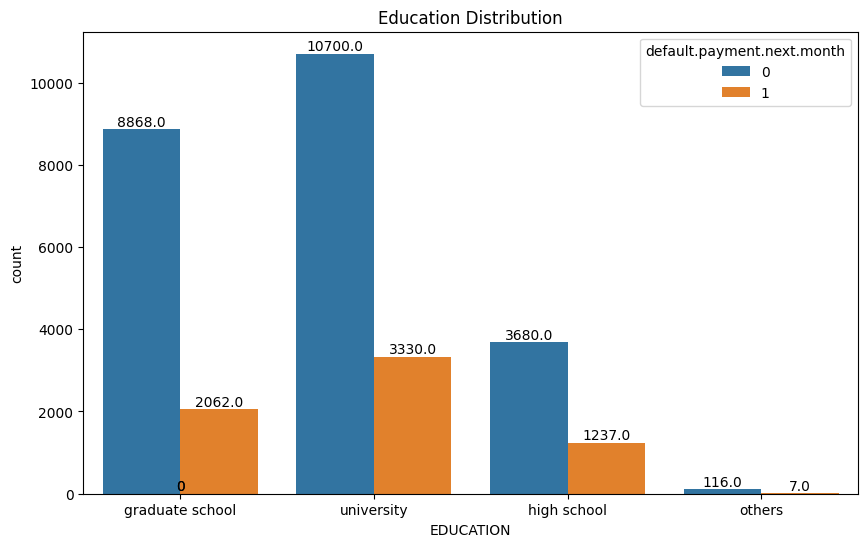

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='EDUCATION', hue='default.payment.next.month',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")
plt.show()

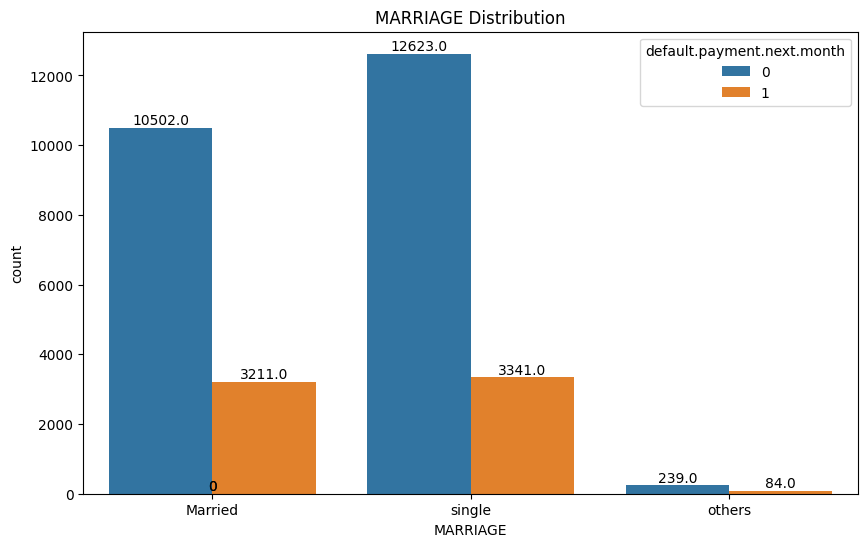

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='MARRIAGE',hue='default.payment.next.month',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")
plt.show()

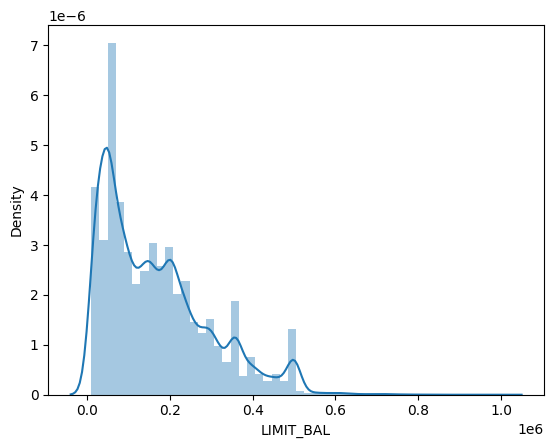

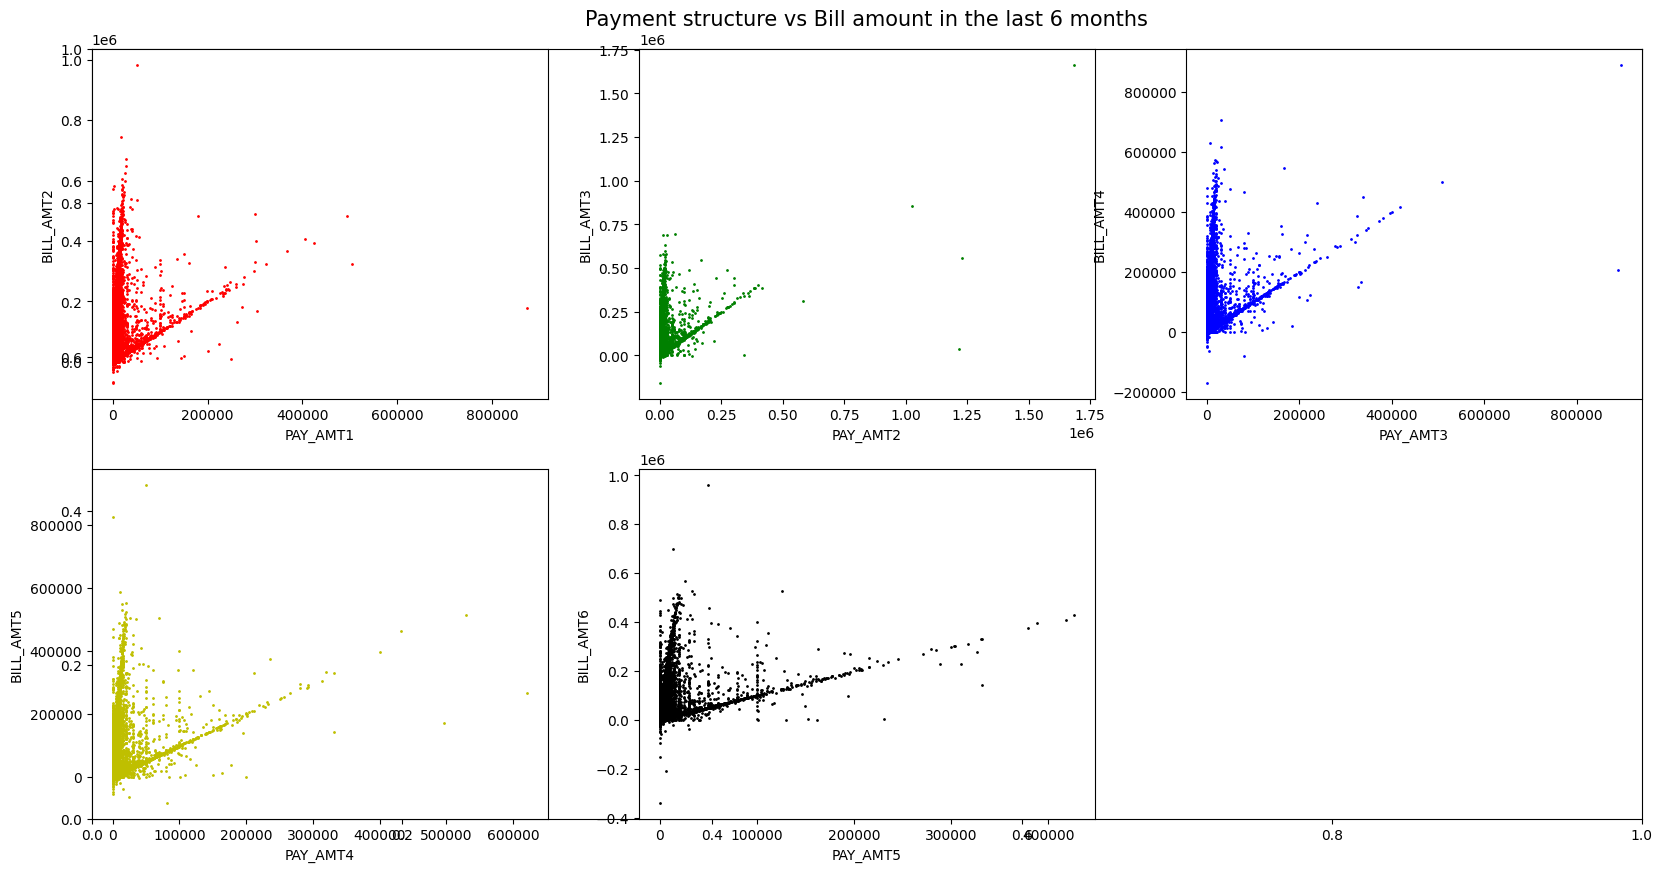

In [37]:
sns.distplot(df.LIMIT_BAL, kde=True)
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT2, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT2')
plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT3, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT3')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)
plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT4, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT4')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT5')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT6, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT6')
plt.show()

In [38]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))
# define oversampling strategy
SMOTE= SMOTE()
# fit and apply the transform
X_train,y_train= SMOTE.fit_resample(X_train,y_train)
# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})
